<h1 style="color:Green;">Week 1 Lab - due by 10th July, 2022 (11:59 pm CDT )</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/19UcHoIW3OC2Fd18_VkooiumdG5NtQpu-RoCgfz_I4nM/edit#slide=id.g11b032e97d3_0_0">[Week 1 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to perform Exploratory Data Analysis (EDA) on a multiple-asset portfolio</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

Months following the COVID-19 pandemic recovery, the stock market seems to slow down on its ralley and the cryptocurrency market continues to show volatility. As a quantitative analyst and an investor, you want to understand the empirical behaviors of the assets before building a predictive model and investing in them, since you believe that this can give you a statistical edge in your portfolio. You have several assets in mind and would like to conduct an initial analysis on their historical performances to see if they are a good makeup for your portfolio.<br><br>
Please complete the following problems to perform full EDA on your stock selection.

<h2 style="color:Green;">Problem 1: Preliminary Visualization</h2>

a) Select 3-5 assets of your preference, then specify their ticker(s), start and end dates of their price data you want to explore.<br><br>
Notice that any assets can be selected, and not just stocks. For example, cryptocurrency and foreign exchange instruments can be suggested as well. Some relatively new cryptocurrencies (e.g., Solana, USD Coin) only have complete data dating back to three or four years ago, so setting the duration of data further back than these dates may result in inaccurate representation of their relationships.

In [2]:

symbolList =  ['GME','TSLA','MRNA','BE','AMZN','JEPI','GOOG'] # asset ticker symbols 
START_DATE = '2015-07-11' # asset data start date 
END_DATE = '2022-07-11' # asset data end date


Run the following code chunk to extract the adjusted close prices and compute log returns of Apple's stock from Yahoo Finance.<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [3]:
stockPxList = pdr.DataReader(symbolList , 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
stockLogRetList = np.log(stockPxList).diff().dropna()

b) Please write a code piece to perform 2 visualizaitons on the assets' log returns you extracted from a). <br><br>
Since there are at least 3 assets, plots such as time plot, scatter plot, box plot, and histogram would have to be plotted more than once to evaluate each asset.

In [4]:
for name in symbolList:
    stockLogRetList[name].describe()
stockLogRetList['GME'].describe()

count    537.000000
mean       0.006290
std        0.113625
min       -0.916291
25%       -0.034368
50%       -0.001699
75%        0.034489
max        0.853716
Name: GME, dtype: float64

In [5]:
stockLogRetList['TSLA'].describe()

count    537.000000
mean       0.002693
std        0.041755
min       -0.236518
25%       -0.020311
50%        0.002421
75%        0.024935
max        0.179327
Name: TSLA, dtype: float64

In [6]:
stockLogRetList['MRNA'].describe()

count    537.000000
mean       0.001789
std        0.050884
min       -0.197163
25%       -0.028462
50%        0.000334
75%        0.031933
max        0.187071
Name: MRNA, dtype: float64

In [7]:
stockLogRetList['BE'].describe()

count    537.000000
mean       0.001513
std        0.058531
min       -0.226179
25%       -0.033999
50%       -0.002220
75%        0.030143
max        0.315884
Name: BE, dtype: float64

In [8]:
stockLogRetList['AMZN'].describe()

count    537.000000
mean      -0.000169
std        0.022823
min       -0.151398
25%       -0.011721
50%        0.000537
75%        0.011731
max        0.126949
Name: AMZN, dtype: float64

In [9]:
stockLogRetList['JEPI'].describe()

count    537.000000
mean       0.000540
std        0.007029
min       -0.031983
25%       -0.002626
50%        0.001055
75%        0.004173
max        0.022611
Name: JEPI, dtype: float64

In [10]:
stockLogRetList['GOOG'].describe()

count    537.000000
mean       0.000945
std        0.018310
min       -0.058155
25%       -0.008138
50%        0.002214
75%        0.010982
max        0.071353
Name: GOOG, dtype: float64

Text(0.5, 1.0, 'Correlations Between Stock Log Return')

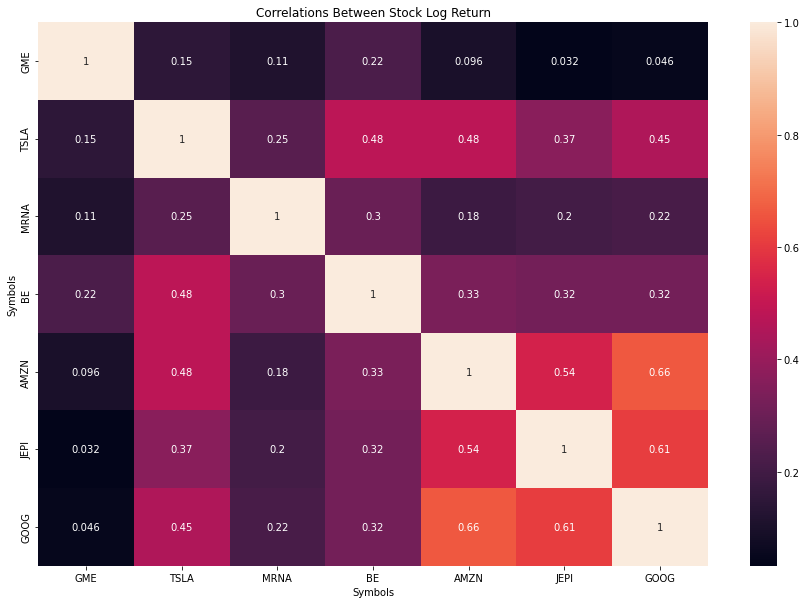

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(stockLogRetList.corr(),annot=True)
plt.title("Correlations Between Stock Log Return")

Text(0, 0.5, 'Density')

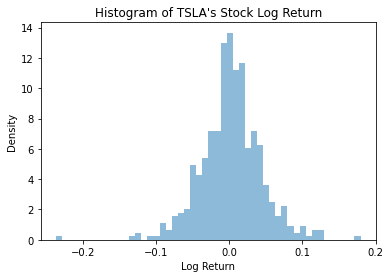

In [12]:
#2 TSLA
_, bins, _= plt.hist(stockLogRetList['TSLA'], bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + symbolList[1] + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

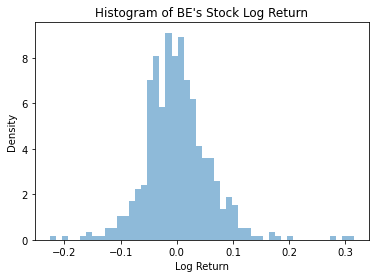

In [13]:
#2 BE
_, bins, _= plt.hist(stockLogRetList['BE'], bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + symbolList[3] + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

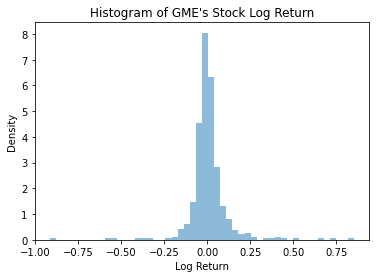

In [14]:
# GME
_, bins, _= plt.hist(stockLogRetList['GME'], bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + symbolList[0] + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

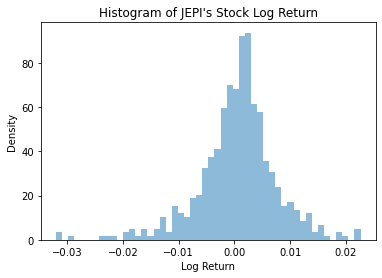

In [15]:
# GME
_, bins, _= plt.hist(stockLogRetList['JEPI'], bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + symbolList[5] + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

Visualization #1: 

In [16]:
## Log returns

#1 Netflix
ax = stockLogRetList['NFLX'].plot(figsize=(8, 5),
                      title=symbolList[0]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();


KeyError: 'NFLX'

In [ ]:
#2 TSLA
ax = stockLogRetList['TSLA'].plot(figsize=(8, 5),
                      title=symbolList[1]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();

In [ ]:
#3 NVDA
ax = stockLogRetList['NVDA'].plot(figsize=(8, 5),
                      title=symbolList[2]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();

In [ ]:
#4 TWTR
ax = stockLogRetList['TWTR'].plot(figsize=(8, 5),
                      title=symbolList[3]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();

In [ ]:
#5 Meta
ax = stockLogRetList['Meta'].plot(figsize=(8, 5),
                      title=symbolList[4]+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();

Visualization #2:

In [ ]:
#1 NFLX
_, bins, _= plt.hist(stockLogRetList['NFLX'], bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + symbolList[0] + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

In [ ]:
#2 TSLA
_, bins, _= plt.hist(stockLogRetList['TSLA'], bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + symbolList[1] + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

In [ ]:
#3 NVDA
_, bins, _= plt.hist(stockLogRetList['NVDA'], bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + symbolList[2] + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

In [ ]:
#4 TWTR
_, bins, _= plt.hist(stockLogRetList['TWTR'], bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + symbolList[3] + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

In [ ]:
#OVERALL
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(nrows=2,ncols=2)

ax0.hist(stockLogRetList['NFLX'], bins=50, density=1, alpha=0.5)
ax0.set_title("Histogram of " + symbolList[0] + "'s Stock Log Return")

ax1.hist(stockLogRetList['TSLA'], bins=50, density=1, alpha=0.5)
ax1.set_title("Histogram of " + symbolList[1] + "'s Stock Log Return")

ax2.hist(stockLogRetList['NVDA'], bins=50, density=1, alpha=0.5)
ax2.set_title("Histogram of " + symbolList[2] + "'s Stock Log Return")

ax3.hist(stockLogRetList['TWTR'], bins=50, density=1, alpha=0.5)
ax3.set_title("Histogram of " + symbolList[3] + "'s Stock Log Return")

fig.tight_layout()

c) Interpret the visualizations that you performed above. What can you say about them?

Netflix's log returns is centered around 10% to -10% (daily log return graph), only occassionally exceeding out this general limit (around 10 times), but there is one time when drastically decreased 40% (in 2022).
Tesla is centured around 15% to -15%, but there is only one time exceeding 20% down.
Nvidia is centured around 10% to -10%, and generally stays that way, it only has 3 instances of extending that limit.
Twitter is mostly centured around 10% to -10%, but is periodically drops more than 20% or increases more than 20%

Of these four Tesla is the one that usually has greater returns / greater losses (as it fluctuates wider and the density is greater on the tails than other stocks I choice)
Nvidia should be the more or less stable choice, as it fluctuates low.

<h2 style="color:Green;">Problem 2: Preliminary Normality Testing</h2>

You realized that within the date range you specified, there may be some days when the assets make big directional swings, hence skewing the data or thickening the probabilities of extreme values. To keep your minds in peace, you decided to perform normality testing to understand how your assets' distribution compare to what's condered 'normal'.<br><br>
(e.g., If your date range spans the COVID-19 pandemic, you may see more extreme tail values or outliers in your log returns, which deviates from a normal distribution because the market fluctuates a lot during this time.)<br><br>
a) Please write a code piece to perform 1 normality test on the assets' returns you extracted from problem 1.

In [ ]:
shapiro_test=stats.shapiro(stockLogRetList['TWTR'])
shapiro_test.pvalue

b) Interpret the result you obtained from the normality test you chose in part a). What can you say about it?

Because the p-value is significantly lower than the usual 0.05 assumed, the null hypothesis (that the log returns of Twitter Stock is from a normal distribution) is rejected. TWTR's log return is not a normal distribution.

<h2 style="color:Green;">Problem 3: Preliminary Pre-processing </h2>

Imbalanced labels is a classification predictive modeling problem where the distribution of examples across the classes is not equal. For example, we may collect measurements of cats and have 80 samples of one cat species and 20 samples of a second cat species. This represents an example of an imbalanced classification problem. A 50-50 or a near-50-50 sample species would form a balanced classification problem.<br/>

As a quantitative analyst, you are curious as to how the list of assets you chose above helps predict the direction of another asset. But before diving into the modeling portion, you want to investigate any label imbalance problems. <br>

Please read this blog before jumping into this question: https://machinelearningmastery.com/what-is-imbalanced-classification/

a) Specify the ticker of the asset whose direction you are interested in predicting. This stock shall be different than the ones you chose in problem 1.

In [ ]:
SYMBOL = 'META' # asset ticker symbol

Run the following code chunk. This will binarize the returns for the asset that you're trying to predict over the period specified above. In other words, the asset's price will be transformed into 0's and 1's - 0 if price did not go up, 1 if price went up. A bar plot is produced to show the label distribution. For instance, there should be one bar showing how many days the stock goes up and another showing how many days the stock goes down.<br/>

<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [ ]:
FEATURES = symbolList.copy()
stockPx = pdr.get_data_yahoo(SYMBOL, START_DATE, END_DATE)['Adj Close'] # storing adjusted stock prices into a variable 
stockPx01 = (stockPx.pct_change().dropna() > 0).astype(int)
# visualize directional label distribution
ax = sns.countplot(x = stockPx01)
plt.title('Directional (Up=1/Down=0) Distribution')
plt.xlabel(SYMBOL + ' Direction')
plt.ylabel('Count')
total = len(stockPx01)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

b) Are the lables balanced or imbalanced? Why?<br/>

The labels are mostly balanced, with only a slight imbalance, as the ratio of distribution of up and down is 48% : 52%, very close to a balance (50%:50%).

c) How do you think they can affect our prediction? (Hint: think about what the training data will look like)

As the algorithm for predictive modeling usually assumes an equal number of each class, an imbalance will cause too few of test cases in one class of the training set, which result in a poor predictive strength of that class.

d) Please suggest one way to handle imbalanced data?

Use SMOTE (Synthetic Minority Over-sampling Technique) to give some data from the majority class to the minority class.

e) What is are the features in this problem? 

The list of assets I choose before (Nvidia,Tesla,Twitter,and Netflix)

f) Please write a one-line code to split the data into 80% training set and 20% testing set.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(stockPxList[1:],stockPx01,test_size=0.2,random_state=0)

In [ ]:
stockPxList[1:].info()
stockPx01.info()

g) Please write a code piece to visualize the feature importance ranking of with a bar plot. How are the features ranked by their importance scores?<br><br> 
(Hint: you would need to split the data first in part e) before computing the importance scores here)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
importances=rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

Netflix is most important in predicting whether Meta's stock goes up or down, followed by Tesla, then Twitter, finally Nvidia, which is least important in predicting Meta.